Importing required libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from tabulate import tabulate

**Loading dataset from my google drive**
> When prompted, click on the link to get authentication to allow Google to access your Drive. You should see a screen with “Google Cloud SDK wants to access your Google Account” at the top. After you allow permission, copy the given verification code and paste it in the box in Colab.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Once you have completed verification, go to the CSV file in Google Drive, right-click on it and select “Get shareable link”. The link will be copied into your clipboard. Paste this link into a string variable in Colab.

In [0]:
link = "https://drive.google.com/open?id=1-4kayelqVCPoy_9VbRvNEtpcJDz_1Qx7"

What you want is the id portion after the equal sign. To get that portion, type in the following code:

In [8]:
fluff, id = link.split('=')
print(id)

1-4kayelqVCPoy_9VbRvNEtpcJDz_1Qx7


Finally, type in the following code to get the file into a dataframe

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('wine_quality.csv')  
wine = pd.read_csv('wine_quality.csv')

Checking all columns after loading the data from the drive

In [11]:
wine.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type', 'quality_label'],
      dtype='object')

Drop the extra column named 'Unnamed: 0'

In [0]:
wine = wine.drop(['Unnamed: 0'], axis=1)

From the visualizations in the previous notebook [Data visualization](https://colab.research.google.com/drive/1QEXx8AlGdjyVLPS7SJJX5Q3sB3CfcOak), we know that the features 'volatile acidity' and 'total sulfur dioxide' are highly relevant to the output target 'type'. So we will be storing those two attributes in variables x1 and x2, and the target in the variable y.

In [0]:
x1 = wine['volatile acidity'].values
x2 = wine['total sulfur dioxide'].values

y = wine['type'].values

Standardization of features

In [0]:
x1 = (x1 - x1.min()) / (x1.max() - x1.min())
x2 = (x2 - x2.min()) / (x2.max() - x2.min())

Splitting dataset into training and testing

In [0]:
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(x1, x2, y, test_size=0.2)

**Logistic Regression**
> Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

**What is the Sigmoid Function?**
>In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1.

Sigmoid Function Graph

---
![Sigmoid Function Graph](https://miro.medium.com/max/640/1*OUOB_YF41M-O4GgZH_F2rw.png) 

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

Cost Function


---

![Cost Function](https://miro.medium.com/max/801/1*2g14OVjyJqio2zXwJxgj2w.png)

In [0]:
def error(a,b,c,x1,x2,y):
  err = 0
  N = len(y)
  for i in range(N):
    f = a*x1[i] + b*x2[i] + c
    err += -y[i]*np.log(sigmoid(f)) - (1-y[i])*np.log(1-sigmoid(f))

  return err/N

Gradient descent function
> The main goal of Gradient descent is to minimize the cost value.

In [0]:
def step_gradient(a,b,c,x1,x2,y,learning_rate):
  grad_a = 0
  grad_b = 0
  grad_c = 0
  N = len(y)
  for i in range(N):
    f = a*x1[i] + b*x2[i] + c
    grad_a += (sigmoid(f) - y[i])*x1[i]
    grad_b += (sigmoid(f) - y[i])*x2[i]
    grad_c += (sigmoid(f) - y[i])

  a = a - (grad_a * learning_rate)
  b = b - (grad_b * learning_rate)
  c = c - (grad_c * learning_rate)

  return a,b,c

In [0]:
def descend(init_a,init_b,init_c,x1,x2,y,learning_rate,iterations):
  a, b, c = init_a, init_b, init_c
  for i in range(iterations):
    err = error(a,b,c,x1,x2,y)
    if i%1000 == 0:
      print("Error: %.5f | a: %.5f | b: %.5f | c: %.5f" %(err,a,b,c))
    a,b,c = step_gradient(a,b,c,x1,x2,y,learning_rate)

  return a,b,c

Function to predict accuracy for raw code 

In [0]:
def accuracy(a,b,c,x1,x2,y):
    correct = 0
    for i in range(len(y)):
        f = a*x1[i] + b*x2[i] + c
        prediction = sigmoid(f)
        if prediction > 0.5:
            z = 1
        else:
            z = 0
        if y[i] == z:
            correct += 1

    acc = (correct/len(y))*100
            
    return acc

Defining parameters and bias

In [0]:
a, b, c = 1, 1, 1
learning_rate = 0.001
iterations = 10000

Training the model

In [25]:
descend(a,b,c,x1_train,x2_train,y_train,learning_rate,iterations)

Error: 0.55993 | a: 1.00000 | b: 1.00000 | c: 1.00000
Error: 0.12902 | a: -16.19544 | b: 22.86350 | c: -0.07151
Error: 0.12612 | a: -18.20983 | b: 25.98138 | c: -0.18907
Error: 0.12569 | a: -19.00775 | b: 27.20568 | c: -0.23214
Error: 0.12560 | a: -19.37239 | b: 27.75936 | c: -0.25057
Error: 0.12558 | a: -19.54749 | b: 28.02365 | c: -0.25910
Error: 0.12558 | a: -19.63337 | b: 28.15288 | c: -0.26320
Error: 0.12557 | a: -19.67591 | b: 28.21679 | c: -0.26522
Error: 0.12557 | a: -19.69708 | b: 28.24858 | c: -0.26621
Error: 0.12557 | a: -19.70764 | b: 28.26443 | c: -0.26671


(-19.712920936728725, 28.27234561461619, -0.2669556707876454)

Plot the data vs hypothesis

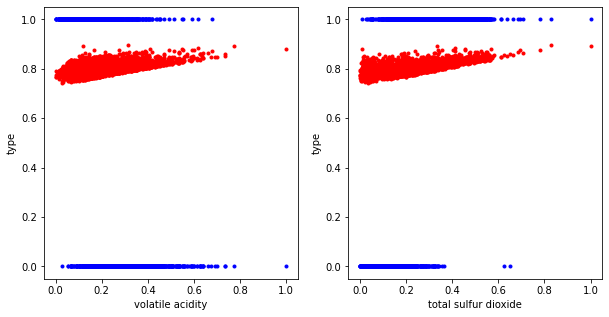

In [27]:
h = a*x1_train + b*x2_train + c
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(x1_train, y_train, 'b.', x1_train, sigmoid(h), 'r.')
plt.xlabel('volatile acidity')
plt.ylabel('type')

plt.subplot(1,2,2)
plt.plot(x2_train, y_train, 'b.', x2_train, sigmoid(h), 'r.')
plt.xlabel('total sulfur dioxide')
plt.ylabel('type')

plt.show()

Raw Code Accuracy

In [82]:
train_acc1 = str(round(accuracy(a,b,c,x1_train,x2_train,y_train), 2)) + "%"
test_acc1 = str(round(accuracy(a,b,c,x1_test,x2_test,y_test), 2)) + "%"

raw_code_accuracy = [[train_acc1, test_acc1]]
print('Raw Code Accuracy')
print(tabulate(raw_code_accuracy, headers=['Train dataset', 'Test dataset'], tablefmt='fancy_grid'))

Raw Code Accuracy
╒═════════════════╤════════════════╕
│ Train dataset   │ Test dataset   │
╞═════════════════╪════════════════╡
│ 75.33%          │ 75.62%         │
╘═════════════════╧════════════════╛


Training the model with sklearn's inbuilt LogisticRegression linear model

In [0]:
x_train = np.array([x1_train, x2_train])
x_test = np.array([x1_test, x2_test])

In [0]:
x_train = x_train.T
x_test = x_test.T

In [0]:
model = LogisticRegression()
result = model.fit(x_train, y_train)

In [0]:
y_pred1 = model.predict(x_train)
y_pred2 = model.predict(x_test)

Sklearn Model Accuracy

In [85]:
train_acc2 = str(round(accuracy_score(y_train, y_pred1)*100, 2)) + "%"
test_acc2 = str(round(accuracy_score(y_test, y_pred2)*100, 2)) + "%"

sklearn_model_accuracy = [[train_acc2, test_acc2]]
print('Sklearn Model Accuracy')
print(tabulate(sklearn_model_accuracy, headers=['Train dataset', 'Test dataset'], tablefmt='fancy_grid'))

Sklearn Model Accuracy
╒═════════════════╤════════════════╕
│ Train dataset   │ Test dataset   │
╞═════════════════╪════════════════╡
│ 95.57%          │ 94.15%         │
╘═════════════════╧════════════════╛


**Conclusion**
> As you can see from the above results that using Logistic Regression (raw code) it was unlikely to fit a sigmoid curve after training the data nevertheless the accuracy to predict the type of wine as 0 (red) and 1 (white) was 75%. Whereas the accuracy using the sklearn's LogisticRegression linear model was 95%.